## Import Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import RepeatedKFold

from numpy import *
from sklearn.datasets import make_regression

from sklearn.model_selection import RepeatedKFold


from matplotlib import pyplot

%matplotlib inline
sns.set(color_codes=True)

## Read the data

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df. tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


### Since 'status' is the target variable, moving it to the last column for convenience

In [5]:
target_col=df['status']
df.drop(axis=1, columns='status', inplace=True)

In [6]:
df['status']= target_col

## EDA

### Size and shape of the data

In [7]:
print('The shape of the data is', df.shape)
print('No of rows: ', df.shape[0])
print('No of columns:', df.shape[1])
print('Total no of data entries:', df.size)

The shape of the data is (195, 24)
No of rows:  195
No of columns: 24
Total no of data entries: 4680


### Printing the atrribute names

In [8]:
for i in df.columns:
    print(i)
    

name
MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
status


### The data types of each attribute

In [9]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
status                int64
dtype: object

#### Observation: Here we can see that all the variables are numerical except for name, which won't be a problem

### Checking for null values

In [10]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [11]:
df.isna().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
status              False
dtype: bool

#### So there are no missing values

### Checking for unique values

In [12]:
df.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
status                2
dtype: int64

#### Observation: Only the status attribute is categorical, rest of the attributes are continuous variables

### Five point Summary

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [14]:
five_point=df.describe().T
five_point[['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
MDVP:Fo(Hz),88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),0.085000,0.148500,0.221000,0.350000,1.302000


### Check Skewness in data

In [15]:
pd.DataFrame(df.skew(),columns=['skewness'])

,skewness
MDVP:Fo(Hz),0.591737
MDVP:Fhi(Hz),2.542146
MDVP:Flo(Hz),1.217350
MDVP:Jitter(%),3.084946
MDVP:Jitter(Abs),2.649071
MDVP:RAP,3.360708
MDVP:PPQ,3.073892
Jitter:DDP,3.362058
MDVP:Shimmer,1.666480
MDVP:Shimmer(dB),1.999389


#### Except for few attributes like D2, spread1, spread2 all other attributes are either postively or negatively skewed 

#### Considering all the attributes for building a model can increase the complexity, result in overfitting and poor accuracy, so we have to only choose the attributes that have high association with our target attribute 'status'. Picking only such attributes can increase the overall generalization of the model and accuracy 

<AxesSubplot:>

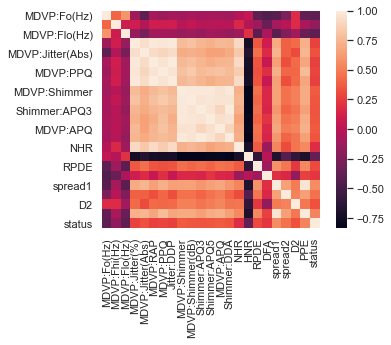

In [16]:
corr_map=df.corr()
sns.heatmap(corr_map,square=True)

In [17]:
correlation_values=df.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

#### It's better to eliminating all attributes that have less that 3 correlation value. Columns MDVP:PPQ to MDVP:Fhi(hz) will be removed

In [18]:
df2=df.copy(deep=True)

In [19]:
cols=['MDVP:PPQ','MDVP:Jitter(%)','MDVP:RAP','Jitter:DDP','DFA','NHR','MDVP:Fhi(Hz)','name']
df2.drop(axis=1, columns=cols, inplace=True)

In [20]:
df2.shape

(195, 16)

## Data Visualization

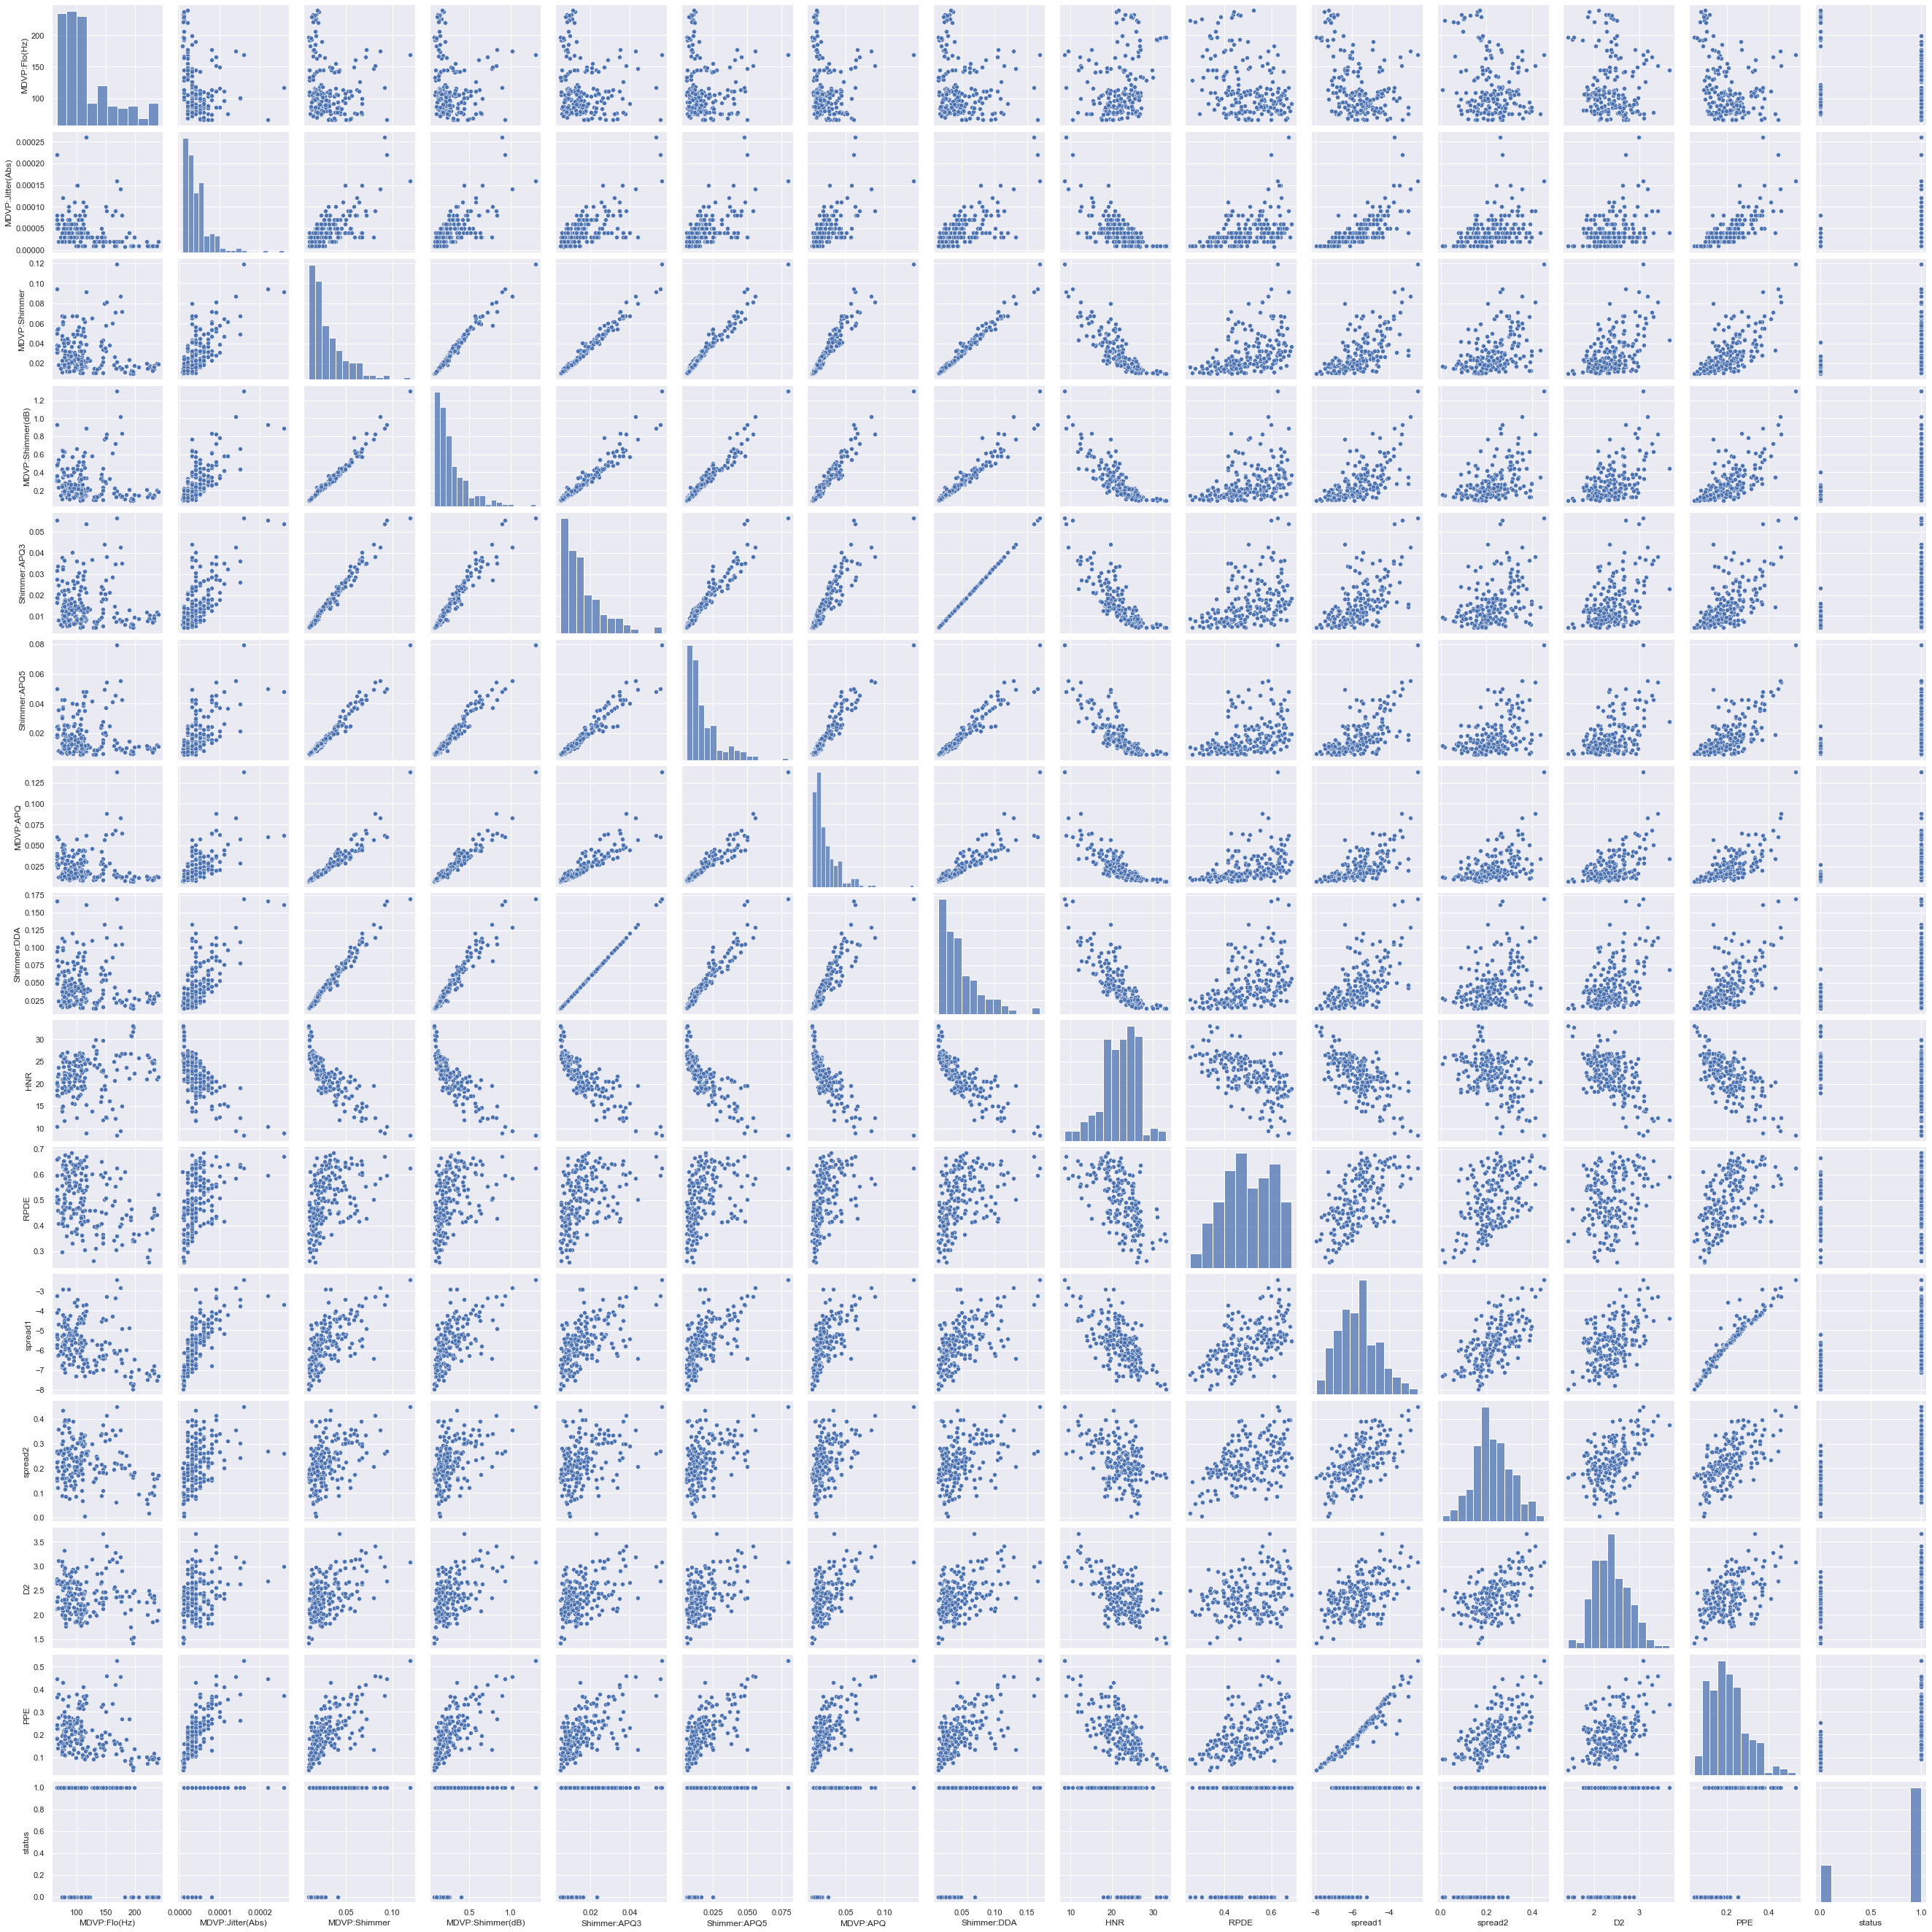

In [21]:
sns.pairplot(df2.iloc[:,1:])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='count'>

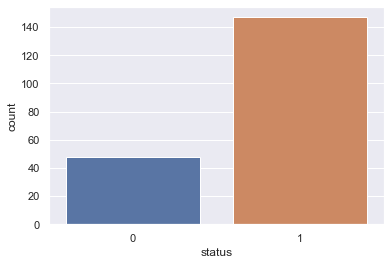

In [22]:
sns.countplot(df['status'])

#### From the plot, the number of people who have been diagonised with Parkinsons disease is higher than those who don't

J:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spread2', ylabel='Density'>

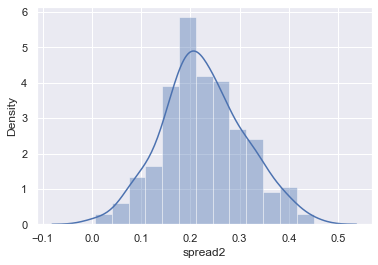

In [23]:
sns.distplot(df['spread2'])

J:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spread1', ylabel='Density'>

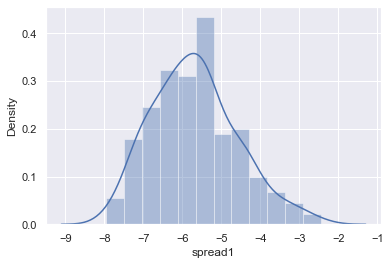

In [24]:
sns.distplot(df['spread1'])

J:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='D2', ylabel='Density'>

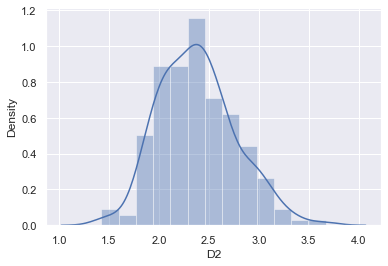

In [25]:
sns.distplot(df['D2'])

#### From the above three plots, only D2, spread1 and spread2 have low skewness when compared with rest of the data, with spread 2 having the lowest skewness and has an almost perfect normal distribution

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PPE', ylabel='spread1'>

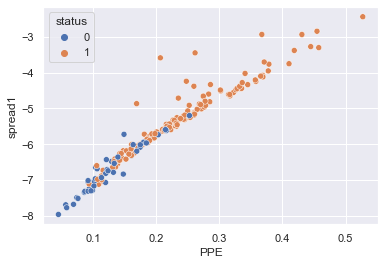

In [26]:
sns.scatterplot(df['PPE'],df['spread1'],hue=df['status'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Shimmer:APQ3', ylabel='Shimmer:DDA'>

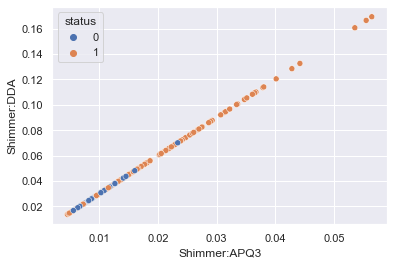

In [27]:
sns.scatterplot(df['Shimmer:APQ3'],df['Shimmer:DDA'],hue=df['status'])

#### The above plots are examples of postive correlations

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HNR', ylabel='Shimmer:DDA'>

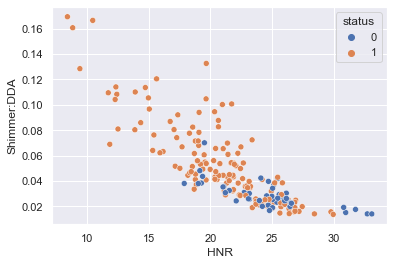

In [28]:
sns.scatterplot(df['HNR'],df['Shimmer:DDA'],hue=df['status'])

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HNR', ylabel='MDVP:Shimmer'>

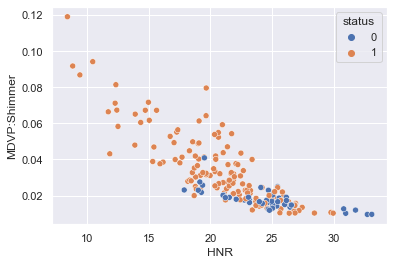

In [29]:
sns.scatterplot(df['HNR'],df['MDVP:Shimmer'], hue=df['status'])

#### From the above plots, it is evident that the attribute HNR is negatively correlated with all other continuous attribute 

### Boxplots of target attribute 'status' with other attributes that hold more correlation

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='MDVP:Flo(Hz)'>

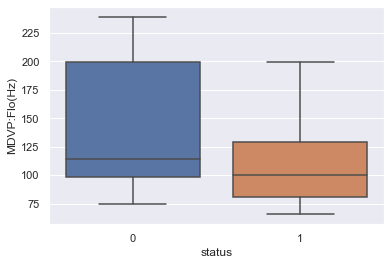

In [30]:
sns.boxplot(df['status'],df['MDVP:Flo(Hz)'])

#### No outliers

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='Shimmer:APQ5'>

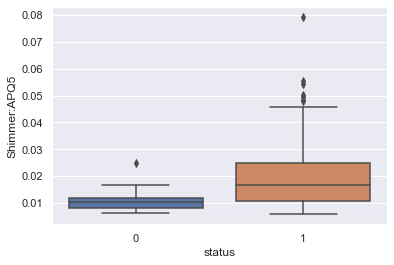

In [31]:
sns.boxplot(df['status'],df['Shimmer:APQ5'])

#### More outliers in persons who have been diagonised with Parkinsons when 'status' is plotted against 'Shimmer:APQ5'

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='spread1'>

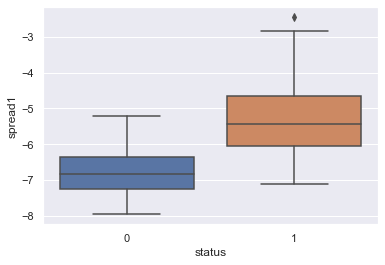

In [32]:
sns.boxplot(df['status'],df['spread1'])

#### Neglible outlier

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='spread2'>

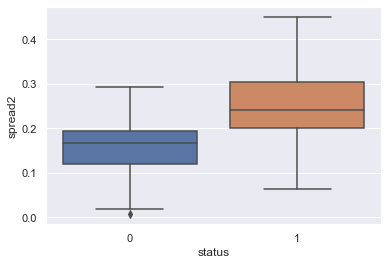

In [33]:
sns.boxplot(df['status'],df['spread2'])

#### Neglible outlier

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='PPE'>

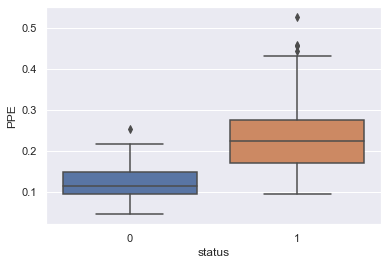

In [34]:
sns.boxplot(df['status'],df['PPE'])

#### Countable number of outliers

J:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='MDVP:Jitter(Abs)'>

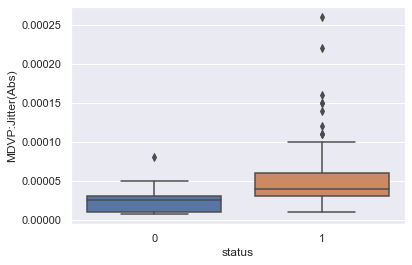

In [35]:
sns.boxplot(df['status'],df['MDVP:Jitter(Abs)'])    

#### Again countable number of outliers

## Split the Dataset

In [36]:
y=df2['status']
df2.drop(axis=1, columns='status', inplace=True)

In [37]:
x=df2.copy(deep=True)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=5)

In [39]:
print('X_train',x_train.shape)
print('X_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (136, 15)
X_test (59, 15)
y_train (136,)
y_test (59,)


## Scale the values

In [40]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

#### No missing values

## Model Building and Training

### Logistic regression

Accurancy : 0.8305084745762712
Logistic TRAIN score :  0.8676470588235294
Logistic TEST score :  0.8305084745762712

[[ 7  9]
 [ 1 42]]

 True Possitive    =  42
True Negative     =  7
False Possive     =  9
False Negative    =  1


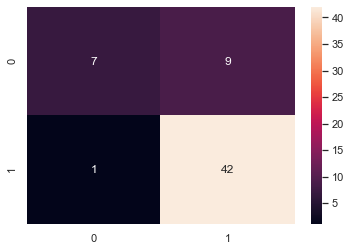

AUC score: 0.9156976744186046


In [41]:
lr=LogisticRegression()
lr.fit(x_train,y_train)


y_pred=lr.predict(x_test)
y_proba=lr.predict_proba(x_test)

print('Accurancy :',accuracy_score(y_test, y_pred))
print("Logistic TRAIN score : ",format(lr.score(x_train, y_train)))
print("Logistic TEST score : ",format(lr.score(x_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)

print('\n True Possitive    = ',cm[1][1])
print('True Negative     = ',cm[0][0])
print('False Possive     = ',cm[0][1])
print('False Negative    = ',cm[1][0])
sns.heatmap(cm,annot=True)
plt.show()



false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

print('AUC score:', roc_auc)

In [42]:
print('\nLogistic Regression Report : \n',metrics.classification_report(y_test,y_pred))
conf_table = cm
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy   : ",round(a,2))
print("precision : ",round(p,2))
print("recall     : ",round(r,2))
print("F1 score   : ",round(f,2))


Logistic Regression Report : 
               precision    recall  f1-score   support

           0       0.88      0.44      0.58        16
           1       0.82      0.98      0.89        43

    accuracy                           0.83        59
   macro avg       0.85      0.71      0.74        59
weighted avg       0.84      0.83      0.81        59

Accuracy   :  0.83
precision :  0.82
recall     :  0.98
F1 score   :  0.89


### KNN 

#### Finding Best value for K

Odd Neighbors : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Accuracy Score : 
 [0.9152542372881356, 0.9152542372881356, 0.9152542372881356, 0.9322033898305084, 0.8983050847457628, 0.8305084745762712, 0.8305084745762712, 0.847457627118644, 0.8305084745762712, 0.8305084745762712]

Misclassification error :
 [0.0847457627118644, 0.0847457627118644, 0.0847457627118644, 0.06779661016949157, 0.10169491525423724, 0.1694915254237288, 0.1694915254237288, 0.15254237288135597, 0.1694915254237288, 0.1694915254237288]

The optimal number of neighbor is k= 7


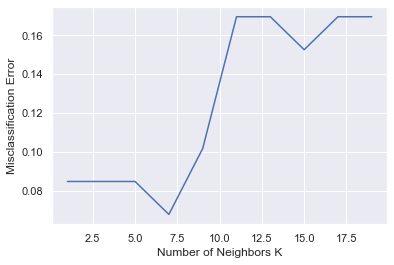

In [43]:
numberList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0 , numberList)) #subsetting just the odd ones

#Declearing a empty list that will hold the accuracy scores
ac_scores = []
#performing accuracy metrics for value from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    #predict the response
    knn.fit(x_train, y_train.values.ravel())               
    y_pred = knn.predict(x_test)
    #evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    #insert scores to the list
    ac_scores.append(scores)                

MSE = [1 - x for x in ac_scores] # changing to misclassification error


# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

print('Odd Neighbors : \n', neighbors)
print('\nAccuracy Score : \n', ac_scores)
print('\nMisclassification error :\n', MSE)
print("\nThe optimal number of neighbor is k=",optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Accurancy  : 0.9322033898305084
KNN TRAIN score with  0.9191176470588235
KNN TEST score with  0.9322033898305084
AUC_score : 0.9803779069767442

[[13  3]
 [ 1 42]]


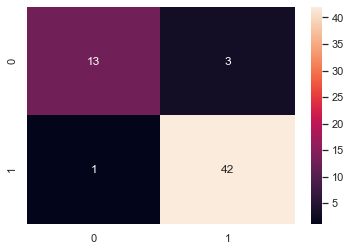

In [44]:
knn=KNeighborsClassifier( n_neighbors=7)
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

y_proba=knn.predict_proba(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)




print('Accurancy  :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score with ",format(knn.score(x_train, y_train)))
print("KNN TEST score with ",format(knn.score(x_test, y_test)))
print('AUC_score :',roc_auc)
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [45]:
print('\nKNN classification Report : \n',metrics.classification_report(y_test,y_pred))
conf_table = cm
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy   : ",round(a,2))
print("precision : ",round(p,2))
print("recall     : ",round(r,2))
print("F1 score   : ",round(f,2))


KNN classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.93      0.98      0.95        43

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59

Accuracy   :  0.93
precision :  0.93
recall     :  0.98
F1 score   :  0.95


### Naïve Bayes

In [46]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
gnb_y_predicted = gnb_model.predict(x_test)
gnb_score = gnb_model.score(x_test, y_test)
gnb_accuracy = accuracy_score(y_test, gnb_y_predicted)
gnb_confusion_matrix = metrics.confusion_matrix(y_test, gnb_y_predicted)


Naïve Bayes Confusion Matrix: 
 [[15  1]
 [13 30]]

AUC_score: 0.8757267441860465
Naïve Bayes Model Accuracy  : 0.762712

True Possitive    =  30
True Negative     =  15
False Possive     =  1
False Negative    =  13


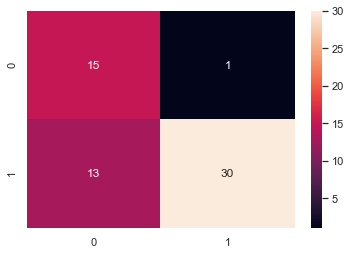

In [54]:
y_proba=gnb_model.predict_proba(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

print('\nNaïve Bayes Confusion Matrix: \n', gnb_confusion_matrix)
print()
print('AUC_score:', roc_auc)
print('Naïve Bayes Model Accuracy  : %f'  % gnb_accuracy)
print('\nTrue Possitive    = ', gnb_confusion_matrix[1][1])
print('True Negative     = ',   gnb_confusion_matrix[0][0])
print('False Possive     = ',   gnb_confusion_matrix[0][1])
print('False Negative    = ',   gnb_confusion_matrix[1][0])
sns.heatmap(gnb_confusion_matrix,annot=True)
plt.show()

In [48]:
print('\n Naive Bayes Report : \n',metrics.classification_report(y_test,gnb_y_predicted))
conf_table = gnb_confusion_matrix
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy   : ",round(a,2))
print("precision : ",round(p,2))
print("recall     : ",round(r,2))
print("F1 score   : ",round(f,2))



 Naive Bayes Report : 
               precision    recall  f1-score   support

           0       0.54      0.94      0.68        16
           1       0.97      0.70      0.81        43

    accuracy                           0.76        59
   macro avg       0.75      0.82      0.75        59
weighted avg       0.85      0.76      0.78        59

Accuracy   :  0.76
precision :  0.97
recall     :  0.7
F1 score   :  0.81


### SVC

Accurancy  : 0.847457627118644
SVC TRAIN score with  0.8970588235294118
SVC TEST score with  0.847457627118644
AUC score : 0.9200581395348837

[[ 7  9]
 [ 0 43]]


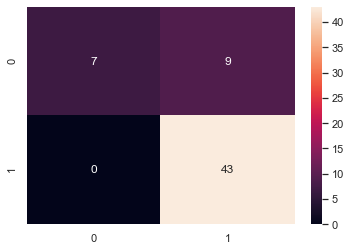

In [49]:
svc=SVC(probability=True)
svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)

y_proba=svc.predict_proba(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)


print('Accurancy  :',accuracy_score(y_test, y_pred))
print("SVC TRAIN score with ",format(svc.score(x_train, y_train)))
print("SVC TEST score with ",format(svc.score(x_test, y_test)))
print('AUC score :', roc_auc)
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [50]:
print('\n SVC: \n',metrics.classification_report(y_test,y_pred))
conf_table = cm
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy   : ",round(a,2))
print("precision : ",round(p,2))
print("recall     : ",round(r,2))
print("F1 score   : ",round(f,2))



 SVC: 
               precision    recall  f1-score   support

           0       1.00      0.44      0.61        16
           1       0.83      1.00      0.91        43

    accuracy                           0.85        59
   macro avg       0.91      0.72      0.76        59
weighted avg       0.87      0.85      0.82        59

Accuracy   :  0.85
precision :  0.83
recall     :  1.0
F1 score   :  0.91


## Meta Classifier

In [51]:

def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
# define meta learner model
    level1 = LogisticRegression()
# define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model
 

model=get_stacking()


def evaluate_model(model, x, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

scores= evaluate_model(model,x,y)
print ('Stacking Accuracy:', mean(scores))




Stacking Accuracy: 0.8599999999999999


## Ensemble Techniques

### Ensemble Technique: Gradient Boosting

Accurancy  : 0.7288135593220338
GradientBoostingClassifier TRAIN score with  0.7647058823529411
GradientBoostingClassifier TEST score with  0.7288135593220338
AUC score : 0.9316860465116279

[[ 0 16]
 [ 0 43]]


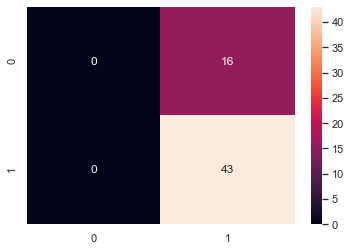


 Grad: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.73      1.00      0.84        43

    accuracy                           0.73        59
   macro avg       0.36      0.50      0.42        59
weighted avg       0.53      0.73      0.61        59

Accuracy   :  0.73
precision :  0.73
recall     :  1.0
F1 score   :  0.84


J:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
gbc=GradientBoostingClassifier(learning_rate=0.02,n_estimators=18,random_state=0)
gbc.fit(x_train,y_train)

y_pred=gbc.predict(x_test)

y_proba=gbc.predict_proba(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)




print('Accurancy  :',accuracy_score(y_test, y_pred))
print("GradientBoostingClassifier TRAIN score with ",format(gbc.score(x_train, y_train)))
print("GradientBoostingClassifier TEST score with ",format(gbc.score(x_test, y_test)))
print("AUC score :", roc_auc)
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

print('\n Grad: \n',metrics.classification_report(y_test,y_pred))
conf_table = cm
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy   : ",round(a,2))
print("precision : ",round(p,2))
print("recall     : ",round(r,2))
print("F1 score   : ",round(f,2))

### Ensemble Technique : Random Forest Classifier

Accurancy  : 0.8305084745762712
RandomForestClassifier TRAIN score with  0.9852941176470589
RandomForestClassifier TEST score with  0.8305084745762712
AUC score : 0.9418604651162792

[[10  6]
 [ 4 39]]


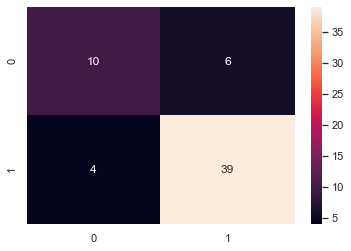


 Random Forest Classification: 
               precision    recall  f1-score   support

           0       0.71      0.62      0.67        16
           1       0.87      0.91      0.89        43

    accuracy                           0.83        59
   macro avg       0.79      0.77      0.78        59
weighted avg       0.83      0.83      0.83        59

Accuracy   :  0.83
precision :  0.87
recall     :  0.91
F1 score   :  0.89


In [53]:
rfc=RandomForestClassifier(max_depth=7,min_samples_split=4,n_estimators=19,random_state=3)
rfc.fit(x_train,y_train)

y_pred=rfc.predict(x_test)

y_proba=rfc.predict_proba(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)



print('Accurancy  :',accuracy_score(y_test, y_pred))
print("RandomForestClassifier TRAIN score with ",format(rfc.score(x_train, y_train)))
print("RandomForestClassifier TEST score with ",format(rfc.score(x_test, y_test)))
print('AUC score :', roc_auc)
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

print('\n Random Forest Classification: \n',metrics.classification_report(y_test,y_pred))
conf_table = cm
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy   : ",round(a,2))
print("precision : ",round(p,2))
print("recall     : ",round(r,2))
print("F1 score   : ",round(f,2))

## Conclusion
### Accuracy of Logistic Regression: 0.83
### Accuracy of KNN:0.93
### Accuracy of Naïve Bayes : 0.76
### Accuracy of SVC: 0.85
### Accuracy of Meta Classifier: 0.86
### Accuracy of Gradient Boosting: 0.73
### Accuracy of Random Forest Classifier: 0.83

#### Based on the aobve observations KNN seems to be the better model at diagonising if anyone has Parkinsons disease or not using the attributes from voice records